## <span style="color:blue"> Computer Vision - Winter 2024

## <span style="color:blue"> Exercise 1 </span>
**Reichman University**

**Lecturer:** Prof. Yael Moses, RUNI

**TA:** Eyal Friedman, RUNI

**Submission date: 10.1.24** \
Note: In case you need an extension for any reason, you can submit it by 14.1.24. \
No extra extensions will be given.

**Your name: [Your Name]**
**Your ID: [Your ID]**

In this exercise, you will practice basic image operations such as loading, saving, and displaying an image, getting familiar with 'numpy,' and understanding the benefits of vectorized operations in Python. This exercise contains three parts:

1. Image Convolution.
2. Implementing a classic Harris corner Detector.
3. Answering questions.

## <span style="color:blue"> Submission guidelines:</span>

1. Your **zip** file should include the following files only:
   - ex1.ipynb
   - images you use
2. You should use Jupyter Notebook.
3. Name the zip file **'ex1_ID_ID.zip'** and **do not** include any additional directories.
4. Submit using *Moodle*.
5. Submit on time!
6. You can submit this assignment in pairs (no triplets).
   * In the case of pair submission, both IDs and names should be added to the notebook.
   * One should submit the homework, and the other should submit a simple text file named: ID_ID.txt and nothing else.
   *Please make sure that your collaborator submits the HW.

## Read the following instructions carefully:

1. Write **efficient vectorized** code. When you think you cannot use vectorized code, give a short explanation of why.
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests unless requested.
3. Use `Python 3` and `numpy 1.18.5` or above. Changes to the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden unless provided by us.
5. Your code must run without errors. Note, **Code that fails to run will not be graded.**
6. Document your code properly.
7. Go over Warmup Python - you can find relevant python functions that will make your life easier.


## Honor Code:
The assignment is a basic tool for learning the material. You can probably find the solution on the web (including ChatGPT), however, you will not learn what you should learn from it. In addition, since we give grades on the assignment, using existing solutions will be considered dishonest.
In particular, you are not allowed to copy or use any code that solve the tasks.
You are more than welcome to talk with your friends, but you are not allowed to give your code or answers and you are not allowed to use their code or answers.
Remember – you take this course in order to learn.

## I declair that I respcet the honor code:
<span style="color:red"> Add here your names: Tom Sabag 208845842 and Gal Moshkovitch 315848929


In [394]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [395]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.9.17
Numpy version:  1.26.3


<span style="color:black">Section A: Convolution
In this part, you will need to write a function **convolvedImage = convolutionMask(img,mask)**  which gets a 2D np.array of a grey level image and a convolution mask (Kernel) and output the convolved image with your mask. It also should plot  the original image and the convolved image side by side. Use captions on each image that indicates what you present. (Hint: see example in Warmup Python in Moodle)\
You may use the convolve2d function from scipy.signal.\
**Note:** Make sure that you understand the differences between correlation and convolution.\
Suggest a convolution mask for each of the 4 cases:
    
1. Mask1:  a convolution mask (kernel)  that computes the average of a 5x5 pixels around each pixel.
   
    
2. Mask2:  a convolution mask (kernel) of size *5×5* such that the maximal value over all possible grey level images (range 0 to 255) will be obtained in the center of a widnow that contains a black  shape region surrounded by white pixels (see the region below).  Note, the rest of the image may contain any values.

    The shape region:
    
   ``  
      255 255 255 255 255
     255  0  255 255 255
     255  0   0   0  255
     255  0   0  255 255
     255 255 255 255 255
     ``

3. Let '*' be a don't care value.\
    Mask3:  a mask as defined in  2 above  but for the following region:
    
    ``  
    0    0     0    0    0
    0    *    255   *    0
    0   255   255  255  255
    0    *    255   0    0
    0    0     0    0    0
      ``
4. Maks 4: a convolution mask (kernel)  that computes a 3 pixel shift of the image to the right.\
    You can ignore the results along the border of the image.

**Submit your function below**.


In [396]:
# This function will be part your functions' test - do not change it
# You may add any helper function for your implementation and to write your code in the cell below

def test_A(imageName):
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

    convolvedImage1 = convolutionMask(img,mask1)

    convolvedImage2 = convolutionMask(img,mask2)

    convolvedImage3 = convolutionMask(img,mask3)

    convolvedImage4 = convolutionMask(img,mask4)

In [397]:
# For each call of the funtion, show on screen the result of your function.

def convolutionMask(img,mask):
    conv = convolve2d(img,mask, mode="same")
    print_result(img,conv, ['Original Image', 'Convolved Image'])
    return conv



def print_result(org_img, mod_img, sub_titles, title=""):
    plt.rcParams['figure.figsize'] = (14.0, 4.0)
    f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')
    if title:
      f.suptitle(title)

    ax1.imshow(org_img), ax1.set_title(sub_titles[0])
    ax2.imshow(mod_img), ax2.set_title(sub_titles[1])

In [398]:
# Masks:

mask1 = np.ones((5,5))/25

mask2 = np.flip(np.array([[1, 1, 1, 1, 1],
                          [1, -1, 1, 1, 1],
                          [1,-1, -1, -1, 1],
                          [1, -1, -1, 1, 1],
                          [1,1, 1, 1, 1]])) # mask with the same pattern as we are looking for

mask3 = np.flip(np.array([[-1, -1, -1, -1, -1],
                          [-1, 0, 1, 0, -1],
                          [-1, 1, 1, 1, 1],
                          [-1, 0, 1, -1, -1],
                          [-1, -1, -1, -1, -1]])) # mask with the same pattern as we are looking for, with 0 at the don't care

mask4 = np.zeros((1,7))
mask4[0,-1] = 1

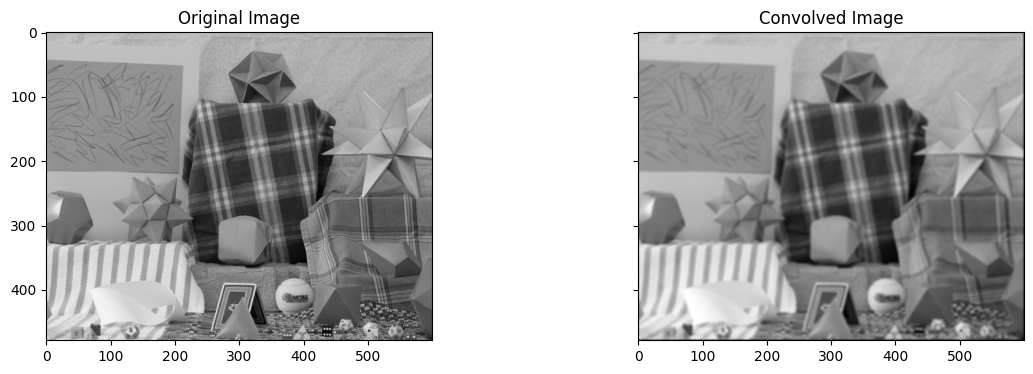

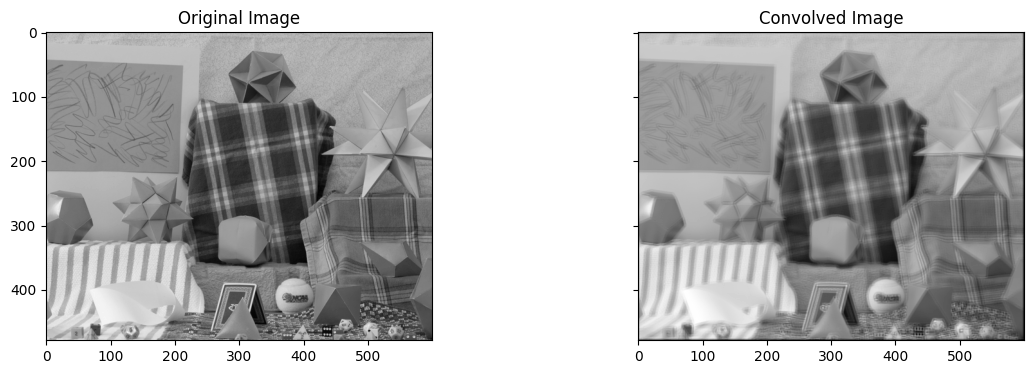

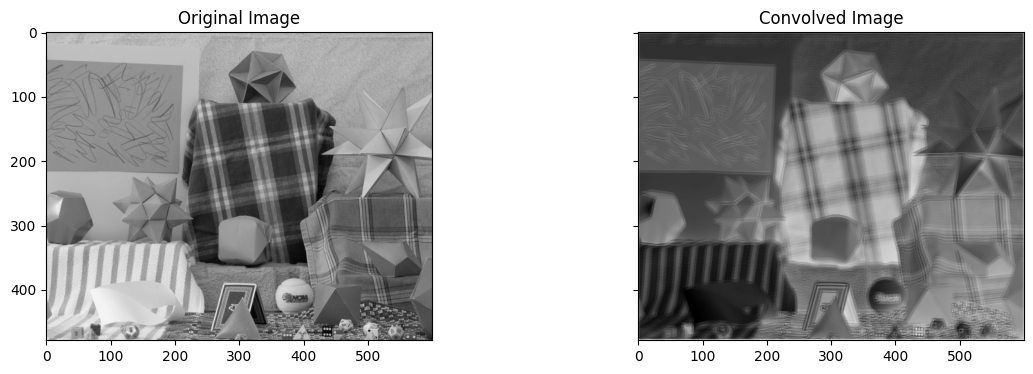

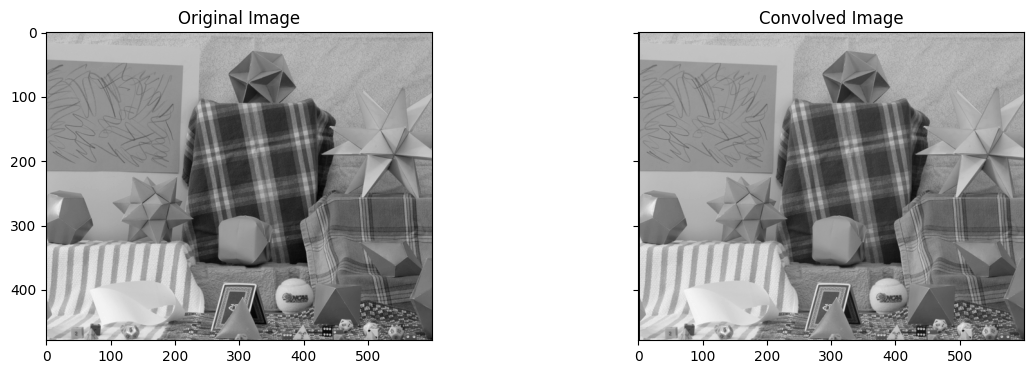

In [399]:
view0_path = 'view0.tif'
img0 = cv2.imread(view0_path, cv2.IMREAD_GRAYSCALE)
test_A(view0_path)

The index with the maximum value after mask2 is: [[72 72]]
The index with the maximum value after mask3 is: [[202 202]]


array([[  0.,   0.,   0., ..., 159., 159., 167.],
       [  0.,   0.,   0., ..., 170., 167., 164.],
       [  0.,   0.,   0., ..., 168., 176., 163.],
       ...,
       [  0.,   0.,   0., ...,  46.,  46.,  46.],
       [  0.,   0.,   0., ...,  45.,  43.,  45.],
       [  0.,   0.,   0., ...,  74.,  79.,  89.]])

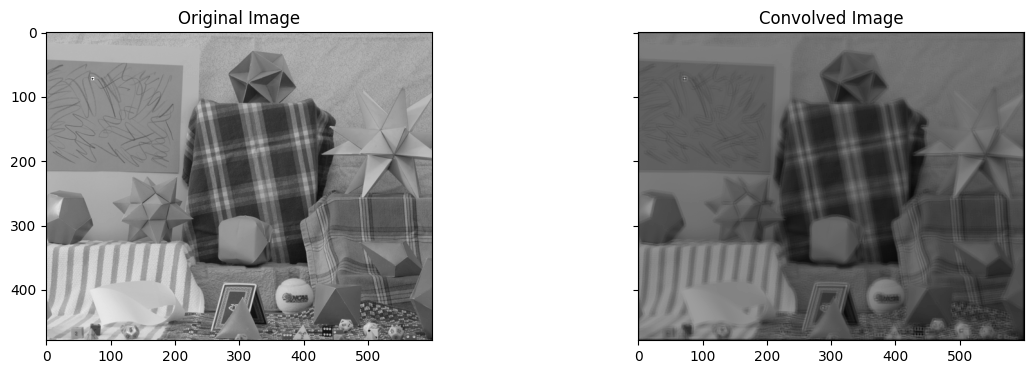

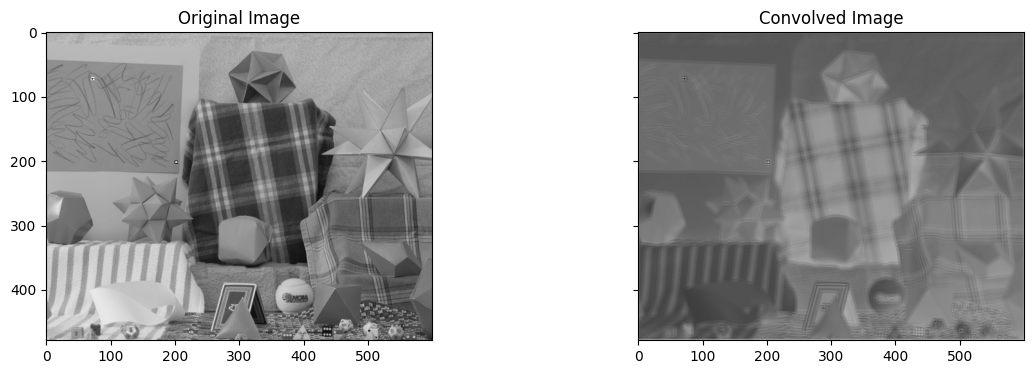

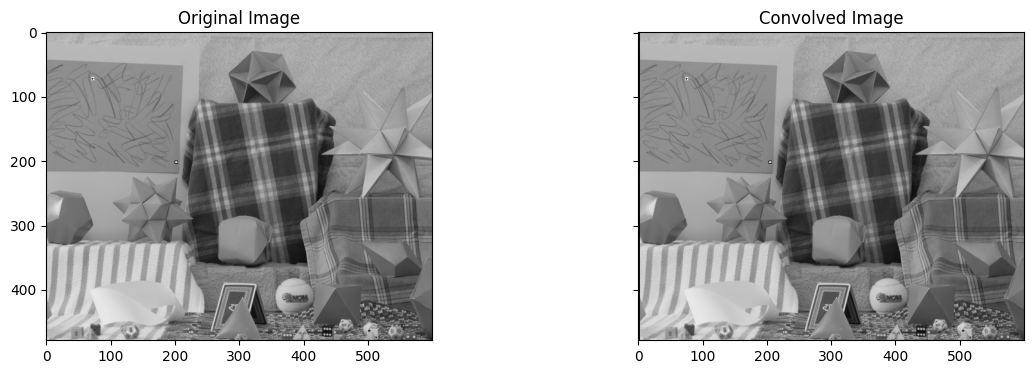

In [400]:
# area for mask 2
mask2_area =  np.array([[1, 1, 1, 1, 1],
                        [1, 0, 1, 1, 1],
                        [1,0, 0, 0, 1],
                        [1, 0, 0, 1, 1],
                        [1,1, 1, 1, 1]]) * 255
img0[70:75,70:75] = mask2_area # planting the pattern we are looking for in index (72,72)
conv = convolutionMask(img0, mask2)
print(f"The index with the maximum value after mask2 is: {np.argwhere(conv == np.max(conv))}")

# area for mask 3
mask3_area =  np.array([[0, 0, 0, 0, 0],
                       [0, 1, 1, 1, 0],
                       [0, 1, 1, 1, 1],
                       [0, 1, 1, 0, 0],
                       [0, 0, 0, 0, 0]]) * 255
img0[200:205,200:205] = mask3_area # planting the pattern we are looking for in index (202,202)
conv = convolutionMask(img0, mask3)
print(f"The index with the maximum value after mask3 is: {np.argwhere(conv == np.max(conv))}")


convolutionMask(img0, mask4)

## <span style="color:blue"> **Section B: Corner Detector**
    
In this section, you will implement the Harris corner detector as covered in class. Refer to the slides of the algorithm details.

Reference to the original paper: A COMBINED CORNER AND EDGE DETECTOR, Harris \& Stephens, Alvey Vision Conference, 1988

You will write the function:\
_Corners_ = H_corner(_im_, _σ _smooth_, _σ _neighb_, _th_, _density_size_, _display_).\
You may add additional parameters if necessary - list them and explain their role.

_im_: a grey-level image.\
_corners_: $k\times 2$ array that consists of the $x$ and $y$ coordinates of each of the $k$  detected corners.\
_display_: a binary parameter.\
Other parameters are described below.
    
    
## <span style="color:blue"> **B1 - Implement Harris**  
    
As part of the algorithm, you should implement the following:
    
1. Compute two kernels with the derivative of a Gaussian: **G_dx, G_dy  = Deriv_Gauss_xy(_sigma_)**.\
   **Note**:\
    (i) Refer to 'Warmup Python' for an example of defining a mask using a function. Modify the Gaussian example to a
    derivative of a Gaussian.\
    (ii) The mask_size should be around 6$\sigma_{smooth}$+1.
    You can check and see if smaller or larger mask size affect the results. You can also look at the plot of the mask. The values close to the border of the masks should be close to zero. On the other hans, the border containing these values are not too wide. Think what it means if this is not the case.\
   **A question for thought (not for submission)**: what is the expected sum of the elements in the kernel?
    
2. Using these masks compute two matrixes, $I_x$ and $I_y$, with the derivatives of the image in the $x$ and in the $y$ directions, respectively:\
    **Ix, Iy = Grad_xy(img,  $\sigma_{smooth}$)**
3. Compute the following three matrices: $I_x^2$, $I_y^2$,  $I_x$  and $I_y$.
4. Compute the four matrices, C11, C12, C22,  each corresponds to a different entry of the matrix for C for all pixels of the image. These matrices are computed by convolving the matrices computed in (3) with a Gaussian defined by $\sigma_{neighb}$.
4. Compute for each pixel, $q$ the eigen value and the eigen vector of its $C(q)$ matrix. Note that in this case you cannot perform it using vectorize operations.\
    or\
    Compute $d(q)= det(C)-k\cdot Trace(C)^2$.  For this case you will need an additional paramter $k$, but you can compute it efficiently using vectorize operations.
5. Threshold the small eignevalue of each pixel,  using the parameter $th$ (or do the same to $d(q)$).\
    Set to zero those pixles that are below the threshold.
6. For each region of size  denisty_size, leave the maximal small eigenvalue value (or smallest $d(q)$).

Return a list of corneres:  the indexes of the corners, and their strength.\
If display = 1, then display as part of the function (as in the class slides):\
a. The original image.\
b. The derivatives of the images, $I_x$ and $I_y$.
         (This is in addition to what is presented in the slides.)\
c. The values of the corner strength before appying the threshold. (Can be in greyscale rather than color. Make sure to normalize it for display.)\
d. The values of the corner strength after appying the threshold. (This should be a binary image.)\
e. The detected corners overlayed on the original image.




## <span style="color:blue"> **B2 - Apply and explore**.
In this part you will apply your Harris corner detector and explore its parameters
Test:
1. Write a script that produces all the required tests.  
2. Suggest a synthetic image to test your algorithm, and present both the image and the results.
3. Test your functions on an image of your choice, exploring various parameters to achieve a 'good' result.\
    Display the results using different parameter values. Provide two images for each parameter to demonstrate its effect on the results. Use the 'title()' function to clarify which pair of parameters is used.
5. Summarize the effects of each parameter on corner detection in your answer.
6. Choose a set of parameters and apply the algorithm to the two images:  view0.tif and view6.tif.
Determine whether the same corners appear in both images. If not, mark an example of a corner that appears on one of the images and not on the other. Provide a possible explanation for why a corner was not found in the other image.
7. List the 3 most interesting things that you learned from this assignment.
8. What was the most non-trivial part of the assignent.

**Submit below as a text or as uploaded image of your text written in a different format**


# Answers:

#### 1. Write a script that produces all the required tests:

In [401]:
def Gaussian(x, y,sig):
    return (1/(2*np.pi*sig**2))*np.exp(-(np.square(x) + np.square(y))/(2*sig**2))

In [402]:
def Deriv_Gauss_xy():
  def G_dy(x, y,sig):
    coeff = -1 * (y / (2 * np.pi * np.power(sig, 4)))
    exp_power = -1 * ((np.power(x, 2) + np.power(y, 2)) / (2 * np.power(sig, 2)))
    return coeff * np.exp(exp_power)

  def G_dx(x, y,sig):
    coeff = -1 * (x / (2 * np.pi * np.power(sig, 4)))
    exp_power = -1 * ((np.power(x, 2) + np.power(y, 2)) / (2 * np.power(sig, 2)))
    return coeff * np.exp(exp_power)

  return G_dx, G_dy


In [403]:
def Grad_xy(img, sig_smooth, kernel_size):
  sig = 6 * sig_smooth + 1

  x = np.linspace(-sig, sig, kernel_size)
  y = np.linspace(-sig, sig, kernel_size)
  x, y = np.meshgrid(x, y)  # Create a grid of points

  G_dx, G_dy = Deriv_Gauss_xy()
  G_dx_flipped = np.flip(G_dx(x, y, sig_smooth))
  G_dy_flipped = np.flip(G_dy(x, y, sig_smooth))
  Ix = convolve2d(img, G_dx_flipped, mode='valid')
  Iy = convolve2d(img, G_dy_flipped, mode='valid')

  return Ix, Iy


In [404]:
def calc_derivatives(img, sig_smooth, kernel_size):
  Ix, Iy = Grad_xy(img, sig_smooth, kernel_size)
  return Ix, Iy

In [405]:
def calc_harris_matrix(Ix, Iy, sig_neighb, kernel_size):
  sig = 6 * sig_neighb + 1

  Ixx = Ix*Ix
  Iyy = Iy*Iy
  Ixy = Ix*Iy

  x = np.linspace(-sig, sig, kernel_size)
  y = np.linspace(-sig, sig, kernel_size)
  x, y = np.meshgrid(x, y)  # Create a grid of points

  kernel = Gaussian(x, y, sig_neighb)
  flipped_kernel = np.flip(kernel)

  C11 = convolve2d(Ixx, flipped_kernel)
  C12 = convolve2d(Ixy, flipped_kernel)
  C22 = convolve2d(Iyy, flipped_kernel)

  return np.array([[C11, C12], [C12, C22]])

In [406]:
def calc_corner_strength(k, C, th):
  height, width = C[0,0].shape
  before_th = np.zeros_like(C[0,0])
  after_th = np.zeros_like(C[0,0])

  for i in range(height):
    for j in range(width):
      C_ij = C[:, :, i, j].reshape(2, 2)
      # 𝑑(𝑞)=𝑑𝑒𝑡(𝐶)−𝑘⋅𝑇𝑟𝑎𝑐𝑒(𝐶)^2
      det = np.linalg.det(C_ij)
      trace_squared = np.power(np.trace(C_ij), 2)
      dq = det -k * trace_squared
      before_th[i,j] = dq

  # Normalize corners strength
  strongest_corner_strength = np.max(before_th)
  before_th_normalized = before_th / strongest_corner_strength * 255

  # Threshold weak corners
  threshold_mask = before_th_normalized > th
  after_th_normalized = np.where(threshold_mask, before_th_normalized, 0)

  return before_th_normalized, after_th_normalized


In [407]:
def non_maximum_suppression(corners, density_size):
  corners = corners.copy()
  padding = density_size // 2
  height, width = corners.shape
  suppressed_img = np.zeros_like(corners)

  corners_index = np.argwhere(corners)
  for x, y in corners_index:
    if padding <= x <= height - padding and padding <= y <= width - padding:
      local_maximum = np.max(corners[x-padding : x+padding+1, y-padding : y+padding+1])
      corner_strength = corners[x,y]
      if corner_strength == local_maximum :
        corners[x-padding : x+padding+1, y-padding : y+padding+1] = 0 # make sure max value is unique
        suppressed_img[x, y] = 255
  return suppressed_img

In [408]:
def get_corners_overlayed_image(img, corners, draw_circles=False):
  corners_overlayed_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

  for x, y, corner_strength in corners:
    if draw_circles:
      cv2.circle(corners_overlayed_image, (y, x), 1, (255,0, 0), -1) # draw a circle in the center of the corner for internal testing
    else:
      corners_overlayed_image[x, y] = (255, 0, 0)
  return corners_overlayed_image

In [409]:
def print_images(images, titles):
  f, axs = plt.subplots(2, 3, sharex='col', sharey='row')
  plt.subplots_adjust(wspace=0.05, hspace=0.2)
  for ax, im, title in zip(axs.flatten(), images, titles):
    ax.imshow(im), ax.set_title(title)
  plt.show()


In [410]:
# k - Introduced a new parameter - the coefficient of the determinant.
# kernel_size - Introduced a new parameter - the size of the kernels used for smoothing and taking a derivative

def H_corner(img, sig_smooth, sig_neighb, th, density_size, display, k, kernel_size):
  Ix, Iy = calc_derivatives(img, sig_smooth, kernel_size)
  C = calc_harris_matrix(Ix, Iy, sig_neighb, kernel_size)
  corners_before_th, corners_after_th = calc_corner_strength(k, C, th)
  corners_img = non_maximum_suppression(corners_after_th, density_size)

  corners_list = [(x, y, corners_before_th[x, y]) for x, y in np.argwhere(corners_img)] # coordinates & strength

  if display == 1:
    corners_overlayed_image = get_corners_overlayed_image(img, corners_list)
    images = [img, Ix, Iy, corners_before_th, corners_after_th, corners_overlayed_image]
    titles = ["Original", "Ix", "Iy", "C Before Threshold", "C After Threshold", "Corners"]
    print_images(images, titles)

  return corners_list

#### 2. Suggest a synthetic image to test your algorithm, and present both the image and the results:

In [411]:
# Algorithm Parameters
sig_smooth = 1
sig_neighb = 1
threshold = 50
k = 0.05
density_size = 15
display = 1
kernel_size = 15

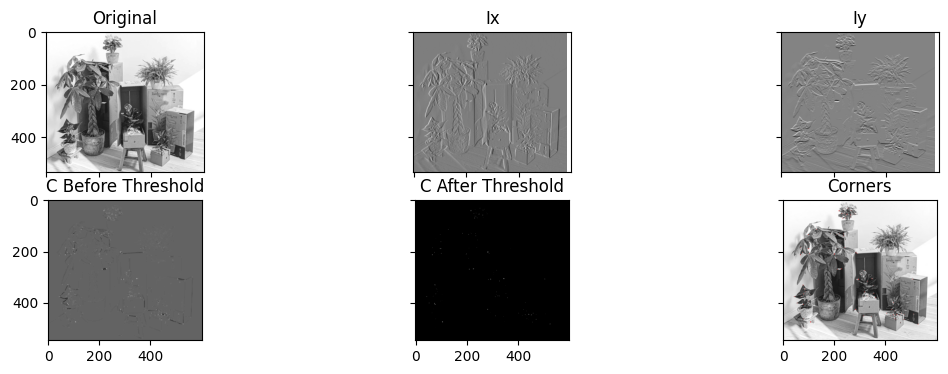

In [412]:
img = cv2.imread('plants.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = H_corner(img, sig_smooth, sig_neighb, threshold, density_size, display, k, kernel_size)

#### Test your functions on an image of your choice, exploring various parameters to achieve a 'good' result. Display the results using different parameter values. Provide two images for each parameter to demonstrate its effect on the results.

In [413]:
display = 0
original_harris = get_corners_overlayed_image(img, H_corner(img, sig_smooth, sig_neighb, threshold, density_size, display, k, kernel_size))

Parameter: sigma_smooth

When siga_smooth is increased, fewer corners are detected. This is because the larger standard deviation causes the Gaussian to widen, resulting in a stronger blurring effect that reduces image details and contrast. As a result, the gradients become weaker, leading to fewer corner detections.

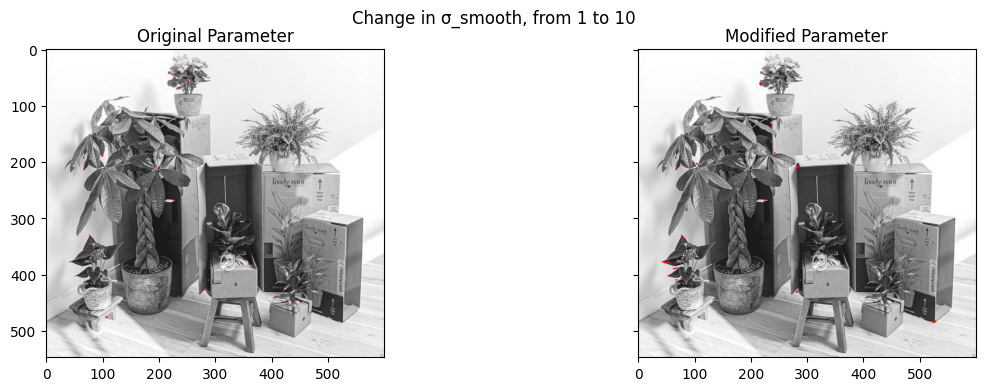

In [414]:
modified_harris = get_corners_overlayed_image(img, H_corner(img, 10, sig_neighb, threshold, density_size, display, k, 35))
print_result(original_harris, modified_harris, ["Original Parameter", "Modified Parameter"], f"Change in σ_smooth, from {sig_smooth} to {10}")

Parameter: sigma_neighb

Modifying siga_neighb to a larger value results in a larger window being used.
This can make the algorithm more robust to noise, and can also lead to a loss of spatial resolution. Modifying it to a smaller value results in a smaller window being used, which can make the algorithm more sensitive to noise but can lead to better spatial resolution.

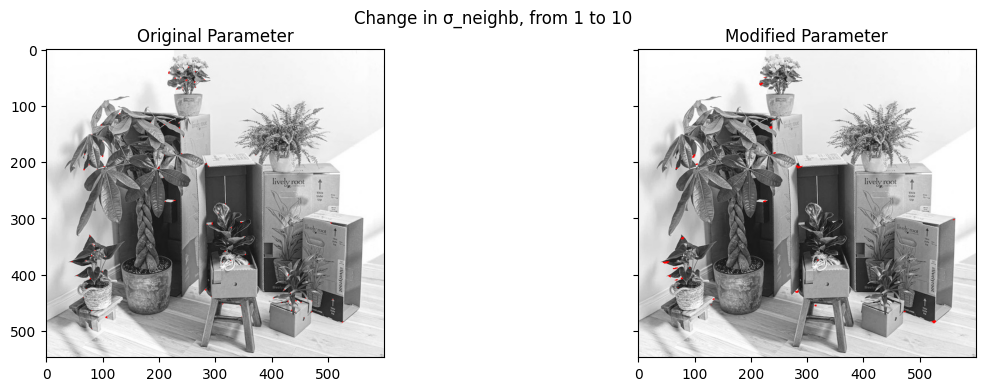

In [415]:
# Change in σ_neighb
modified_harris = get_corners_overlayed_image(img, H_corner(img, sig_smooth, 10, threshold, density_size, display, k, 35))
print_result(original_harris, modified_harris, ["Original Parameter", "Modified Parameter"], f"Change in σ_neighb, from {sig_neighb} to {10}")

Parameter: threshold

Modifying threshold to a larger value reduce the number of corner detected as corners with weaker streangth would be eliminated.


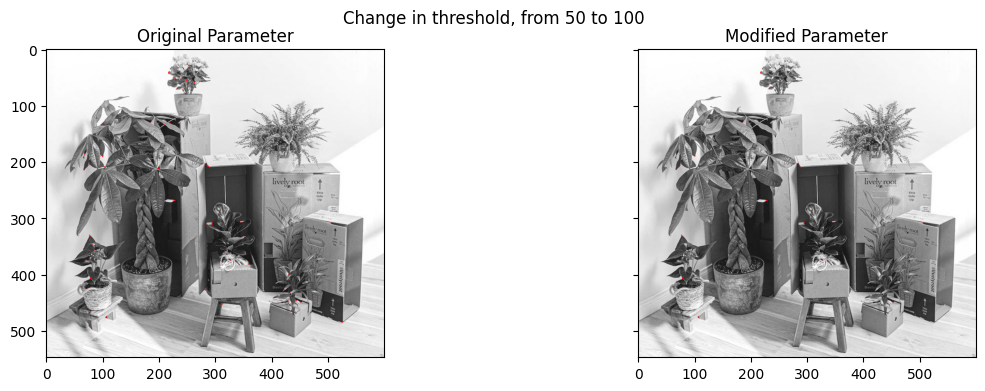

In [416]:
# Change in threshold (normalized 0-255)
modified_harris = get_corners_overlayed_image(img, H_corner(img, sig_smooth, sig_neighb, 100, density_size, display, k, kernel_size))
print_result(original_harris, modified_harris, ["Original Parameter", "Modified Parameter"], f"Change in threshold, from {threshold} to {100}")

Parameter: density size

Modifying the density size to a leger value can decrease the number of neighboring corners detected, as only the strongest corner value in the area will be kept.

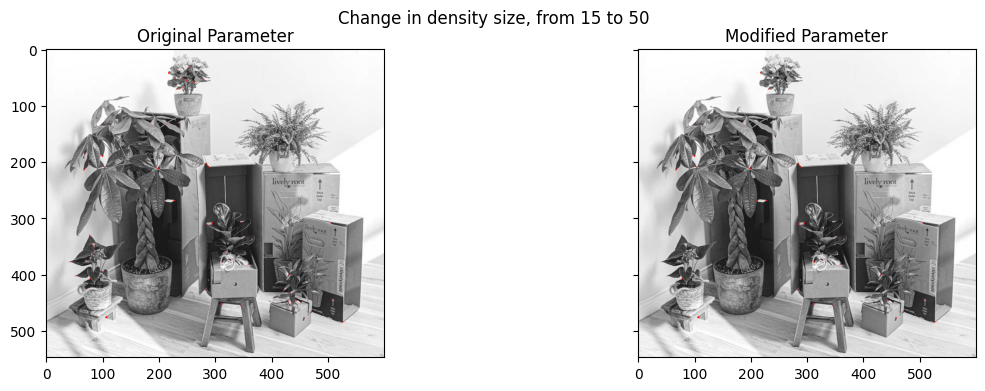

In [417]:
# Change in density size
modified_harris = get_corners_overlayed_image(img, H_corner(img, sig_smooth, sig_neighb, threshold, 50, display, k, kernel_size))
print_result(original_harris, modified_harris, ["Original Parameter", "Modified Parameter"], f"Change in density size, from {density_size} to {50}")

#### Choose a set of parameters and apply the algorithm to the two images: view0.tif and view6.tif. Determine whether the same corners appear in both images. If not, mark an example of a corner that appears on one of the images and not on the other. Provide a possible explanation for why a corner was not found in the other image.

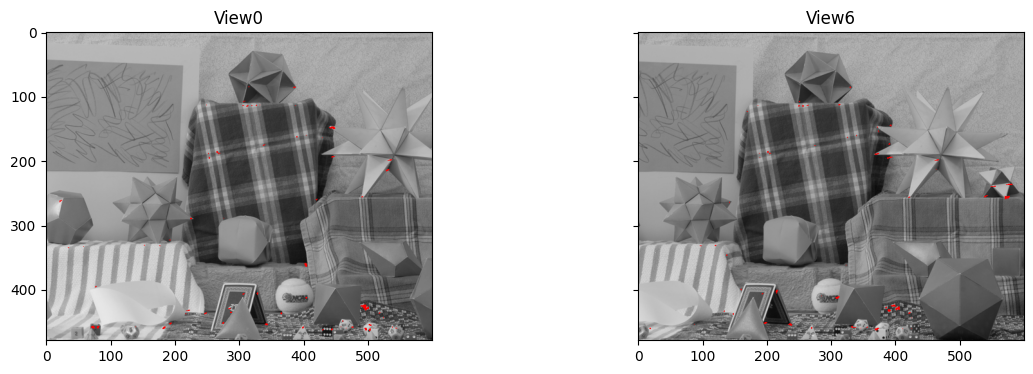

In [418]:
# Algorithm Parameters
sig_smooth = 1
sig_neighb = 0.5
threshold = 15
k = 0.1
density_size = 25
display = 0
kernel_size = 30

view0 = cv2.cvtColor(cv2.imread('view0.tif'), cv2.COLOR_BGR2GRAY)
view6 = cv2.cvtColor(cv2.imread('view6.tif'), cv2.COLOR_BGR2GRAY)

view0_corners =  get_corners_overlayed_image(view0, H_corner(view0, sig_smooth, sig_neighb, threshold, density_size, display, k, kernel_size))
view6_corners =  get_corners_overlayed_image(view6, H_corner(view6, sig_smooth, sig_neighb, threshold, density_size, display, k, kernel_size))

print_result(view0_corners, view6_corners, ["View0", "View6"])

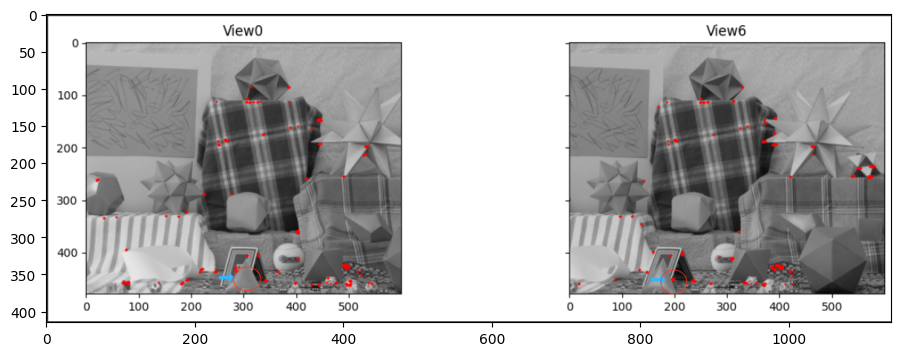

In [419]:
compare = plt.imread('compare.png')
plt.imshow(compare)

We can observe that the pictures depict different perspectives of the scene. In the right image, the marked picture frame is visible, and the algorithm identifies its bottm right as a corner. Conversely, in the left image, the picture frame is obstructed by a piramide, therefore the algorithm cannot identify the same corner.

#### List the 3 most interesting things that you learned from this assignment:

1. The importance of parameters in computer vision algorithms:
Throughout the implementation of this algorithm, we tried multiple different combinations of parameters, tweaking them to achieve a good corner detection result. We learned a lot about the importance and effect of each parameter in this specific algorithm and in computer vision algorithms generally.
2. Kernels: exploring different kernels in section A, and applying kernels in section B, we learned how powerful can convolution be in the context of image manipulation.
3. Math: In this exercise we used multiple mathematical tools in order to manipulate images (determinant, convolution, eigenvectors, gaus equations, etc...). It was very interesting for us to see a very practical use of theoretical mathematical concepts.

#### What was the most non-trivial part of the assignent:

For us, the most non-trivial part of the assignment was learning how to use numpy efficiently in this algorithm, manipulating images using vector based operations, instead of multiple local computations for each entry with for loops.